# Churn for Bank Customers
## Predict customer churn in a bank
#### T5 Online Data Science Bootcamps for SDAIA Academy

#### Business Goals and Problem Context

Due to the evolving number of the banks and the strong competition between them,  banks look forward to increase their shar of the market by attracting more customers and maintaining the existing ones. acquiring new customers is more costly than retaining the old ones. The studies show that improving the retention rate by up to 5 % can increase a bank’s profit up to 85 % . This is define the significant need  of the bank to take into consideration their existing loyal profitable customers , maintain them, and trying to preventing them from leaving the bank. This could be achieved by the early prediction of the customers that might have a potentially to leave or discontinue using the bank services. s we know, it is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the bank. Churn. prevention allows banks to develop loyalty programs and retention campaigns to keep as many customers as possible.
For this purpose we aim in this project to develop a prediction model that is able to anticipate the customers that are willing to leave based on their pregiven records on the bank.


In [84]:
# importing the necessary libraraies
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis


In [85]:
#loading data file
df_BankChurn = pd.read_csv('churn.csv')

### 1.  Understanding the data

In [86]:
df_BankChurn.shape

(10000, 14)

In [87]:
df_BankChurn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
df_BankChurn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [89]:
df_BankChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [90]:
df_BankChurn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [91]:
df_BankChurn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [92]:
df_BankChurn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [93]:
df_BankChurn['Exited'].unique()

array([1, 0], dtype=int64)

In [94]:
df_BankChurn['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [95]:
df_BankChurn['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [96]:
df_BankChurn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [97]:
df_BankChurn['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [98]:
df_BankChurn['IsActiveMember'].unique()

array([1, 0], dtype=int64)

### 2. Cleaning Data

In [99]:
#checking for any missing or null values
df_BankChurn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [100]:
#Drope the features that have no effect on the target value.
Customers = df_BankChurn.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [101]:
Customers
Customers.shape

(10000, 11)

## 3. Realationship Analysis 

In [103]:
Correlation = Customers.corr()

<AxesSubplot:>

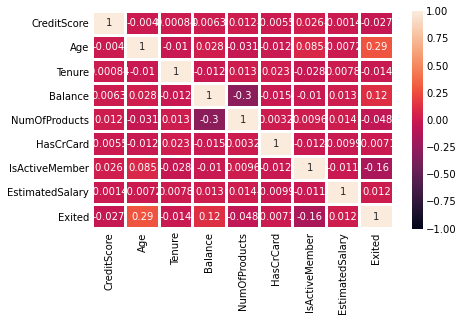

In [256]:
sns.heatmap(Correlation, xticklabels= Correlation.columns, yticklabels= Correlation.columns, annot=True, linewidths=2,vmin=-1, vmax=1 )

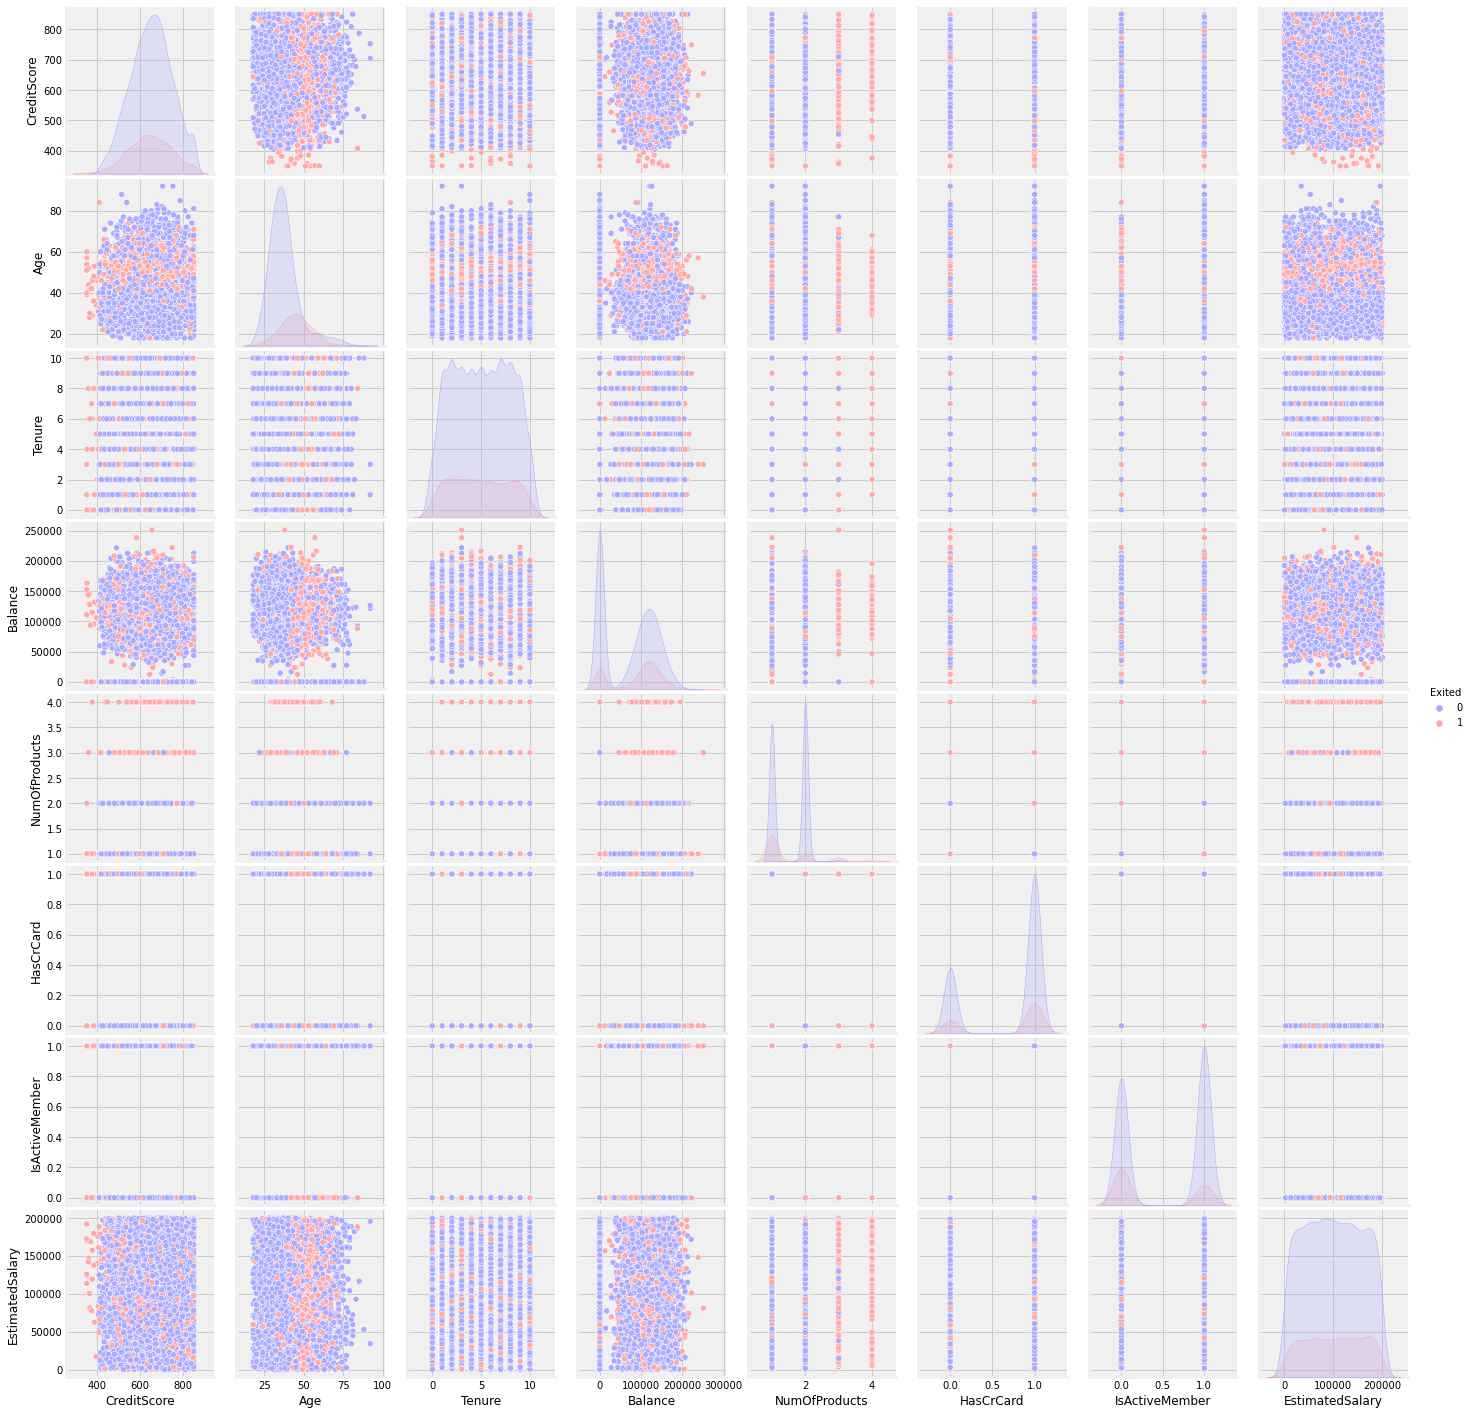

In [255]:
sns.pairplot(Customers, hue='Exited', palette='bwr');

### Checking whether our dataset is balanced or not regarding to our target value 'Exited'.
create a chart to show the count of churn or retained customer.


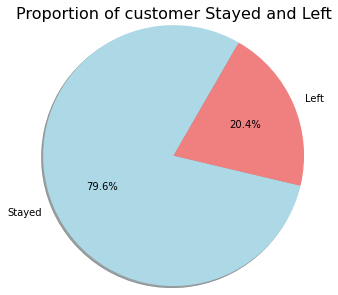

In [201]:
#sns.countplot(x ='Exited', data = Customers);
plt.pie(Customers['Exited'].value_counts(), labels =['Stayed','Left'], radius=1.5, autopct='%1.1f%%',
        shadow=True, startangle=60,colors = ['lightblue', 'lightcoral'], data= Customers);

plt.title("Proportion of customer Stayed and Left",y=1.1 ,size = 16)

plt.show()

In [188]:
#show the nsumber of observation based on the exited (Target Value)
Customers['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

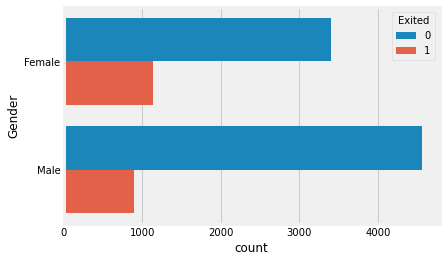

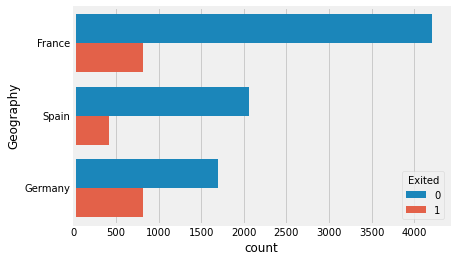

In [198]:
# count
sns.countplot(y ='Gender', hue = "Exited", data = Customers)
 
# Show the plot
plt.show()
# count
sns.countplot(y ='Geography', hue = "Exited", data = Customers)
 
# Show the plot
plt.show()

In [150]:
#Creating a seperate dataframe for categorical and numerical features for further analysis
Num_Cust_data = Customers.drop (['Gender','Geography','Exited'],axis=1)
Cat_Cust_data = Customers.drop (Num_Cust_data.columns,axis=1)

In [151]:
Num_Cust_data.head()
#Cat_Cust_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


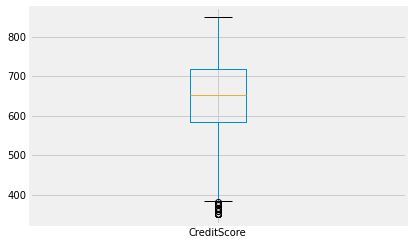

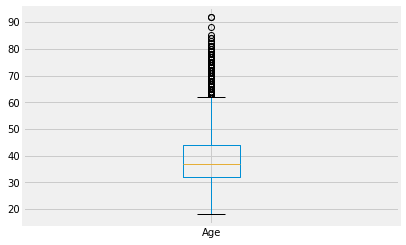

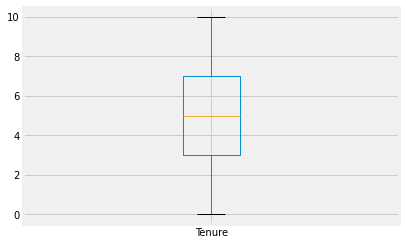

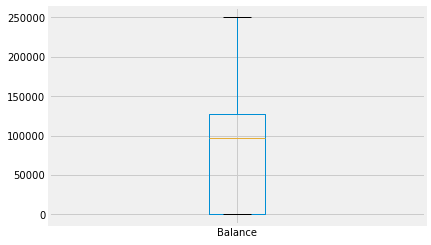

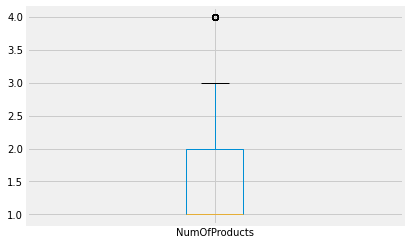

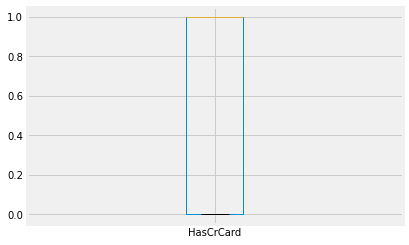

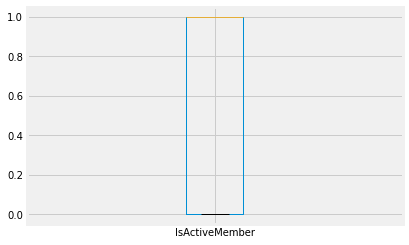

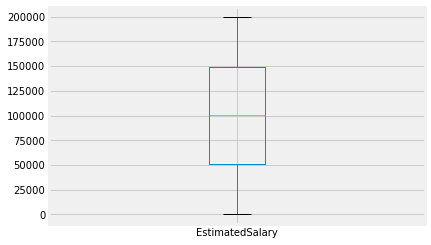

In [152]:
for column in Num_Cust_data:
    plt.figure()
    Num_Cust_data.boxplot([column])

The Graph aboove shows tha we have an oulliesr in 2 Features,CreditScore and the Age

## Feature Engineering 

#### 1- Categoriacl values: changeing them into Dummy variables

In [209]:
#dealing with caegorical data, Converting them into dummmy variablesto enable sklearn e to understand them
Customers_final = pd.get_dummies(Customers, columns=['Gender','Geography'],drop_first=True)
Customers_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


#### 2- Numerical values: dealing with Outliers & Feature Scaling
as we have an outlier in Age and CreditScore, Normalization is not an option here.
Standrization must be used for Feature Scaling as we have an ouliers, features with diffrent units, and KNN model is intended to be used


## Train Test Split

Now its time to split our data into a training set and a testing set,  Using sklearn.

In [210]:
from sklearn.model_selection import train_test_split

In [226]:
X = Customers_final.drop('Exited',axis=1)
y = Customers_final['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [231]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


## Training the Random Forest model

In [232]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
rfc = RandomForestClassifier(n_estimators=600)

In [234]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation


In [235]:
predictions = rfc.predict(X_test)

In [236]:
#create a classification report from the results.
from sklearn.metrics import classification_report,confusion_matrix

In [237]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.78      0.49      0.60       622

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000



In [224]:
print(confusion_matrix(y_test,predictions))

[[2298   80]
 [ 318  304]]


## Training a KNeighbors Model

### Feature Scaling

In [243]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [244]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc= sc.transform(X_test)

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
logmodel = LogisticRegression()
logmodel.fit(X_train_sc,y_train)

LogisticRegression()

## Predictions and Evaluations


In [248]:
predictions = logmodel.predict(X_test_sc)

#Get the accuracy of both the train & test set then compare it to reach a conclusion

In [252]:
logmodel.score(X_train_sc,y_train)

0.8137142857142857

In [254]:
accuracy_score(y_test,predictions)

0.805

In [253]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2378
           1       0.59      0.20      0.29       622

    accuracy                           0.81      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.77      0.81      0.76      3000



In [251]:
print(confusion_matrix(y_test,predictions))

[[2293   85]
 [ 500  122]]
